In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

In [67]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Label : 5


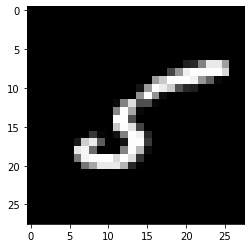

In [68]:
plt.imshow(x_train[11], cmap='gray')
print(f'Label : {y_train[11]}')

In [69]:
def visualize_random_img_for_each_target(X ,y, nrows, ncols):
  
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
  
  random_image = np.random.randint(100)
  
  index = nrows + ncols
  for row in range(nrows):
    for col in range(ncols):
      mask = y == nrows + ncols - index
      mask = mask.squeeze()
      axes[row, col].imshow(X[mask][random_image], cmap='gray')
      index -=1 


  print("index for each image :{}".format(np.unique(y)))

index for each image :[0 1 2 3 4 5 6 7 8 9]


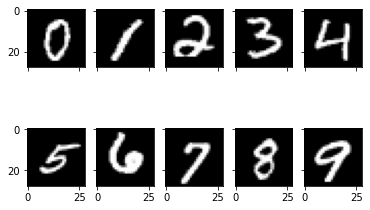

In [70]:
visualize_random_img_for_each_target(x_train, y_train, 2, 5)

In [71]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [72]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [73]:
next(iter(ds_train.take(1)))[0].shape

TensorShape([16, 28, 28, 1])

In [74]:
# Création d'un model 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [76]:
LR = 0.001

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [78]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1917 - accuracy: 0.9404 - val_loss: 0.0509 - val_accuracy: 0.9836
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 

In [79]:
predictions = model.predict(x_test)
print(predictions)

[[1.4674911e-11 2.1766887e-08 5.1856063e-08 ... 9.9999964e-01
  9.9520054e-09 5.5193016e-08]
 [1.2903475e-11 8.6664459e-10 1.0000000e+00 ... 7.2078628e-14
  1.3047175e-13 1.2086115e-15]
 [4.3520437e-10 9.9999714e-01 1.7803519e-09 ... 6.0516752e-09
  2.6696839e-06 9.5704706e-09]
 ...
 [2.0887162e-22 7.0550020e-12 2.0860710e-16 ... 6.1771890e-12
  1.0840763e-08 7.0721196e-10]
 [2.9558707e-13 2.7925594e-12 1.1319604e-12 ... 4.0725943e-11
  5.1625525e-06 7.1900623e-09]
 [7.3147200e-12 1.8680759e-14 2.6955879e-13 ... 2.0513872e-17
  6.6072655e-12 1.0959629e-14]]


4


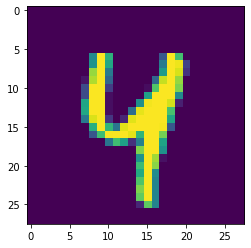

In [80]:
nb = 42

print(predictions[nb].argmax())
plt.imshow(x_test[nb].reshape(28, 28))
plt.show()

In [94]:
print(classification_report(
	    y_test,
	    [i.argmax() for i in predictions],
        )
    )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [95]:
model.save('digit_reconition.h5', save_format='h5')

In [102]:
model.predict(x_test[0].reshape(1, 28, 28, 1)).argmax()

7